In [1]:
import pandas as pd
import anndata
import scanpy as sc
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, linkage
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [2]:
ctx_regions = ['ACAd', 'ACAv', 'PL', 'ILA', 'ORBl', 'ORBvl', 'AId', 'SSs', 'SSp-bfd', 'SSp-ll', 'SSp-ul', 'SSp-n', 'SSp-m', 'MOp',
               'MOs', 'VISal', 'VISl', 'VISp', 'VISpor', 'VISrl', 'VISam', 'VISpm', 'RSPd', 'RSPv', 'AUDp']
th_regions = ['VPL', 'VPM', 'PO', 'PoT', 'VPMpc', 'VPLpc', 'SPFp',
              'MG', 'PIL', 'PP', 'SGN', 'AD', 'AV', 'LD', 'LP', 'VAL', 'PF', 'CL',
              'SubG', 'LGv', 'IGL', 'POL', 'MD', 'IMD', 'CM', 'SMT',
              'SPA', 'VM', 'PCN', 'PVT', 'PT', 'RE', 'SPFm', 'Xi', 'RH', 'IAM', 'PR',
              'LH', 'MH', 'IAD', 'RT']

In [3]:
adata_raw = sc.read_h5ad('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/adata_processed.h5ad')
allen_region = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/allen_region.csv')
adata_raw.obs['region'] = allen_region['region'].values
# add cell type
meta = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/cell_metadata_with_cluster_annotation.csv')
meta = meta.set_index('cell_label')
meta = meta.loc[adata_raw.obs.index.to_list()]
adata_raw.obs['cell_type'] = meta['class'].to_list()
adata_raw.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type
cell_label,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,49.206853,44.877634,12.168155,4.920685,4.487763,1.216815,SSs1,33 Vascular
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,48.973992,44.813761,12.179006,4.897399,4.481376,1.217901,SSs1,33 Vascular
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,48.791066,44.577722,12.192707,4.879107,4.457772,1.219271,SSs1,33 Vascular
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,48.830489,44.426120,12.195078,4.883049,4.442612,1.219508,SSs1,33 Vascular
131102494428104399865219008178262036485,Zhuang-ABCA-3.023,48.308843,43.028156,12.267879,4.830884,4.302816,1.226788,SSs1,34 Immune
...,...,...,...,...,...,...,...,...,...
318102106429791409781741726367984532777,Zhuang-ABCA-3.009,131.090716,69.334275,41.436743,13.109072,6.933427,4.143674,MDRNd,30 Astro-Epen
35262847161560382172299767067854387528,Zhuang-ABCA-3.009,131.216032,69.494070,41.351034,13.121603,6.949407,4.135103,MDRNd,33 Vascular
75415866509570969932943497000463821106,Zhuang-ABCA-3.009,131.415152,70.764504,40.800403,13.141515,7.076450,4.080040,sctd,24 MY Glut


In [4]:
adata_th = adata_raw[adata_raw.obs['region'].isin(th_regions)]
adata_th = adata_th[adata_th.obs['cell_type'].str.contains('Glut')]

adata_ctx = adata_raw[(adata_raw.obs['region'].str.startswith(tuple(ctx_regions))) & (adata_raw.obs['region'].str.contains('5|6'))]
adata_ctx = adata_ctx[adata_ctx.obs['cell_type'].str.contains('Glut')]
adata_ctx.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type
cell_label,,,,,,,,,
29162871883387929795006067736640436040,Zhuang-ABCA-3.023,61.666898,42.255912,12.232613,6.166690,4.225591,1.223261,SSs5,01 IT-ET Glut
293032136699589827732370249746624703959,Zhuang-ABCA-3.023,62.396840,41.838307,12.216430,6.239684,4.183831,1.221643,SSs5,01 IT-ET Glut
169008133492981499504077797165914124518,Zhuang-ABCA-3.023,64.994841,40.394608,12.161029,6.499484,4.039461,1.216103,SSs5,01 IT-ET Glut
227494694293280194589855295428860091482,Zhuang-ABCA-3.023,64.498586,40.611089,12.175537,6.449859,4.061109,1.217554,SSs5,01 IT-ET Glut
33873656525375865261837620890496116573,Zhuang-ABCA-3.023,64.282103,41.059249,12.175800,6.428210,4.105925,1.217580,SSs5,01 IT-ET Glut
...,...,...,...,...,...,...,...,...,...
229580843941555951333299912014571135110,Zhuang-ABCA-3.009,97.429638,10.575478,38.381706,9.742964,1.057548,3.838171,VISp5,01 IT-ET Glut
248292745152448671917314233790662445907,Zhuang-ABCA-3.009,97.150793,11.549455,38.284627,9.715079,1.154945,3.828463,VISp5,01 IT-ET Glut
329636896424947842904418891891676096227,Zhuang-ABCA-3.009,97.098822,10.816952,38.350628,9.709882,1.081695,3.835063,VISp5,01 IT-ET Glut


In [8]:
adata = anndata.concat([adata_ctx, adata_th])
adata.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type
cell_label,,,,,,,,,
29162871883387929795006067736640436040,Zhuang-ABCA-3.023,61.666898,42.255912,12.232613,6.166690,4.225591,1.223261,SSs5,01 IT-ET Glut
293032136699589827732370249746624703959,Zhuang-ABCA-3.023,62.396840,41.838307,12.216430,6.239684,4.183831,1.221643,SSs5,01 IT-ET Glut
169008133492981499504077797165914124518,Zhuang-ABCA-3.023,64.994841,40.394608,12.161029,6.499484,4.039461,1.216103,SSs5,01 IT-ET Glut
227494694293280194589855295428860091482,Zhuang-ABCA-3.023,64.498586,40.611089,12.175537,6.449859,4.061109,1.217554,SSs5,01 IT-ET Glut
33873656525375865261837620890496116573,Zhuang-ABCA-3.023,64.282103,41.059249,12.175800,6.428210,4.105925,1.217580,SSs5,01 IT-ET Glut
...,...,...,...,...,...,...,...,...,...
137125155786416424728071422508382942054,Zhuang-ABCA-3.009,86.480430,34.094203,37.248728,8.648043,3.409420,3.724873,SGN,19 MB Glut
186321231466624970722021094909324401885,Zhuang-ABCA-3.009,86.443977,35.015822,37.291043,8.644398,3.501582,3.729104,POL,19 MB Glut
262284519603134366801326445274337827961,Zhuang-ABCA-3.009,86.388989,32.866518,37.212756,8.638899,3.286652,3.721276,SGN,19 MB Glut


In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata

AnnData object with n_obs × n_vars = 71462 × 1122
    obs: 'brain_section_label', 'x', 'y', 'z', 'x_ccf', 'y_ccf', 'z_ccf', 'region', 'cell_type'
    uns: 'log1p'

### ctx layer56 th correlation

#### L5/L6 corr

In [24]:
mergecell_num = 80
def cluster_region(df_region, num_points=mergecell_num):
    # Perform hierarchical cluster
    Z = linkage(df_region[['x', 'y', 'z']], method='ward')
    # Divided into clusters according to the results of the cluster, each cluster has about NUM_POINTS individual points
    cluster_labels = fcluster(Z, t=len(df_region) / num_points, criterion='maxclust')
    return cluster_labels

# Initialize a empty cluster label
adata.obs['subregion'] = 0
# Perform clusters separately for each area
for region in adata.obs['region'].unique():
    mask = adata.obs['region'] == region
    if adata[adata.obs['region'] == region].shape[0] < 80:
        adata.obs.loc[mask, 'subregion'] = adata.obs.loc[mask, 'region'].apply(lambda x: x + '_1')
        continue
    clu_list = cluster_region(adata.obs[mask])
    cl_list = [f'{region}_{i}' for i in clu_list]
    adata.obs.loc[mask, 'subregion'] = cl_list
adata.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type,subregion
cell_label,,,,,,,,,,
29162871883387929795006067736640436040,Zhuang-ABCA-3.023,61.666898,42.255912,12.232613,6.166690,4.225591,1.223261,SSs5,01 IT-ET Glut,SSs5_16
293032136699589827732370249746624703959,Zhuang-ABCA-3.023,62.396840,41.838307,12.216430,6.239684,4.183831,1.221643,SSs5,01 IT-ET Glut,SSs5_16
169008133492981499504077797165914124518,Zhuang-ABCA-3.023,64.994841,40.394608,12.161029,6.499484,4.039461,1.216103,SSs5,01 IT-ET Glut,SSs5_15
227494694293280194589855295428860091482,Zhuang-ABCA-3.023,64.498586,40.611089,12.175537,6.449859,4.061109,1.217554,SSs5,01 IT-ET Glut,SSs5_15
33873656525375865261837620890496116573,Zhuang-ABCA-3.023,64.282103,41.059249,12.175800,6.428210,4.105925,1.217580,SSs5,01 IT-ET Glut,SSs5_15
...,...,...,...,...,...,...,...,...,...,...
137125155786416424728071422508382942054,Zhuang-ABCA-3.009,86.480430,34.094203,37.248728,8.648043,3.409420,3.724873,SGN,19 MB Glut,SGN_1
186321231466624970722021094909324401885,Zhuang-ABCA-3.009,86.443977,35.015822,37.291043,8.644398,3.501582,3.729104,POL,19 MB Glut,POL_1
262284519603134366801326445274337827961,Zhuang-ABCA-3.009,86.388989,32.866518,37.212756,8.638899,3.286652,3.721276,SGN,19 MB Glut,SGN_1


In [26]:
regions = adata.obs['subregion'].values
gene_expression = adata.X.A

# Create a DataFrame to integrate regional information and gene expression matrix together
df = pd.DataFrame(gene_expression, columns=adata.var_names)
df['subregion'] = regions

# Calculate the average gene expression by regional grouping and calculate the average gene
region_mean_expression = df.groupby('subregion').mean()
# Convert the result to the matrix format of the regional*gene
region_gene_matrix = region_mean_expression.values
region_gene_matrix.shape

(867, 1122)

In [27]:
corr_all = np.corrcoef(region_gene_matrix)
corr_all.shape

(867, 867)

In [28]:
adata_th = adata[adata.obs['region'].isin(th_regions)]
th_subregions = adata_th.obs['subregion'].unique()
th_subregions.shape

(124,)

In [29]:
adata_ctx = adata[adata.obs['region'].str.startswith(tuple(ctx_regions))]
ctx_subregions = adata_ctx.obs['subregion'].unique()
ctx_subregions.shape

(743,)

In [30]:
region_labels = region_mean_expression.index
ctx_indices = [i for i, label in enumerate(region_labels) if label in ctx_subregions]
th_indices = [i for i, label in enumerate(region_labels) if label in th_subregions]
corr = corr_all[np.ix_(ctx_indices, th_indices)]
corr.shape

(743, 124)

In [31]:
ctx_regions_df = [region_labels[i] for i in ctx_indices]
th_regions_df = [region_labels[i] for i in th_indices]
corr_df = pd.DataFrame(corr, index=ctx_regions_df, columns=th_regions_df)
corr_df

,AD_1,AD_2,AD_3,AV_1,AV_2,AV_3,AV_4,CL_1,CL_2,CM_1,...,VPM_2,VPM_3,VPM_4,VPM_5,VPM_6,VPM_7,VPM_8,VPM_9,VPMpc_1,VPMpc_2
ACAd5_1,0.410782,0.399958,0.429878,0.389128,0.399872,0.379626,0.385972,0.433726,0.448486,0.418421,...,0.349622,0.392964,0.367910,0.383102,0.396261,0.393593,0.400477,0.395913,0.471805,0.461550
ACAd5_10,0.393125,0.382621,0.415251,0.376264,0.384030,0.365063,0.373579,0.424826,0.446542,0.411051,...,0.326493,0.371632,0.347403,0.361314,0.376664,0.377090,0.379626,0.376344,0.458214,0.458316
ACAd5_11,0.398234,0.380920,0.420792,0.413818,0.409845,0.394324,0.400633,0.455472,0.467039,0.445792,...,0.374350,0.416192,0.391017,0.403894,0.426616,0.423503,0.427803,0.423335,0.489865,0.486841
ACAd5_12,0.410527,0.393434,0.435584,0.420335,0.419085,0.401034,0.407594,0.460431,0.469367,0.445620,...,0.388494,0.428909,0.405853,0.419587,0.437670,0.435193,0.440099,0.432376,0.496598,0.487125
ACAd5_13,0.396818,0.378964,0.416866,0.407649,0.404479,0.390833,0.399343,0.460673,0.475524,0.454787,...,0.371024,0.411906,0.387836,0.398777,0.426981,0.425960,0.424657,0.425608,0.492338,0.495915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VISrl5_3,0.403946,0.392158,0.447694,0.412068,0.431390,0.391572,0.398629,0.458871,0.478694,0.423189,...,0.357283,0.430841,0.399325,0.415467,0.413560,0.410179,0.426174,0.418796,0.503235,0.475361
VISrl6a_1,0.353894,0.351150,0.377903,0.321932,0.336051,0.315114,0.315966,0.350315,0.362867,0.331669,...,0.279148,0.314711,0.289657,0.306511,0.303450,0.303453,0.311159,0.308828,0.377244,0.372180
VISrl6a_2,0.329470,0.328920,0.359324,0.318948,0.331033,0.303589,0.304252,0.347650,0.365771,0.318220,...,0.264400,0.316115,0.284581,0.302115,0.291393,0.287109,0.301932,0.298410,0.378667,0.372998
VISrl6a_3,0.350070,0.348513,0.380515,0.334510,0.347604,0.322965,0.320802,0.363974,0.382227,0.333347,...,0.267162,0.328005,0.294717,0.311189,0.304804,0.300980,0.316639,0.313798,0.396515,0.383178


In [32]:
tempdf = pd.read_excel('./data/layer56_to_th_connection_strength.xlsx', index_col=0, sheet_name=None)
Rbp4_L5 = tempdf['Sheet1']
Ntsr1_Syt6_L6 = tempdf['Sheet2']

Rbp4_L5 = Rbp4_L5.replace('TN', -10)
Rbp4_L5.loc['SSs'] = Rbp4_L5.loc[['SSs-1', 'SSs-2']].mean(axis=0)
Rbp4_L5.loc['MOs'] = Rbp4_L5.loc[['MOs-1', 'MOs-2']].mean(axis=0)
Rbp4_L5 = Rbp4_L5.drop(['SSs-1', 'SSs-2', 'MOs-1', 'MOs-2'], axis=0)
# Rbp4_L5 = Rbp4_L5.loc[:, col_list]
Rbp4_L5 = Rbp4_L5.loc[ctx_regions]

Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.replace('TN', -10)
Ntsr1_Syt6_L6.loc['SSs'] = Ntsr1_Syt6_L6.loc[['SSs-1', 'SSs-2']].mean(axis=0)
Ntsr1_Syt6_L6.loc['MOs'] = Ntsr1_Syt6_L6.loc[['MOs-1', 'MOs-2']].mean(axis=0)
Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.drop(['SSs-1', 'SSs-2', 'MOs-1', 'MOs-2'], axis=0)
# Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.loc[:, col_list]
Ntsr1_Syt6_L6 = Ntsr1_Syt6_L6.loc[ctx_regions]

Ntsr1_Syt6_L6.shape

(25, 44)

In [33]:
connect_strength = pd.DataFrame(index=corr_df.index, columns=corr_df.columns, dtype=float)
connraw = (Rbp4_L5 + Ntsr1_Syt6_L6)/2
for ctx in tqdm(connraw.index):
    for th in connraw.columns:
        rows = connect_strength.index.str.startswith(ctx)
        cols = connect_strength.columns.str.startswith(th)
        connect_strength.loc[rows, cols] = connraw.loc[ctx, th]

100%|██████████| 25/25 [00:00<00:00, 52.47it/s]


In [37]:
ctx_region_order = ['ACAd', 'ACAv', 'PL', 'ILA', 'ORBl', 'ORBvl', 'AId', 'SSs', 'SSp-bfd', 'SSp-ll', 'SSp-ul', 'SSp-n', 'SSp-m', 'MOp', 'MOs', 'VISal', 'VISl', 'VISp', 'VISpor', 'VISrl', 'VISam', 'VISpm', 'RSPd', 'RSPv', 'AUDp']

In [ ]:
tp = []
tn = []
for c in ctx_region_order:
    tmp = pd.DataFrame()
    tmp['conn'] = connect_strength.loc[connect_strength.index.str.startswith(c)].values.flatten()
    tmp['corr'] = corr_df.loc[corr_df.index.str.startswith(c)].values.flatten()
    tmp_p = tmp[(tmp['conn'] > -2)]
    # top_indices = tmp['conn'].nlargest(10).index
    # tmp_p = tmp.loc[top_indices]
    tmp_n = tmp[tmp['conn'] == -10]
    tp.append(tmp_p['corr'].mean())
    tn.append(tmp_n['corr'].mean())
values = tp
values2 = tn
feature = ctx_region_order

N = len(values)
# Set the angle of the radar diagram to cut a round surface in a flat separation
angles=np.linspace(0, 2*np.pi, N, endpoint=False)
# In order to close the radar map, the following steps need
values=np.concatenate((values,[values[0]]))
values2=np.concatenate((values2,[values2[0]]))
angles=np.concatenate((angles,[angles[0]]))
feature = np.concatenate((feature, [feature[0]]))
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
# Draw a line map
ax.plot(angles, values, 'o-', markersize=2, linewidth=0.5, label = 'TP', color='#E56F5E')
# Fill color
ax.fill(angles, values, alpha=0.25, color='#F19685')
# Draw the second folding drawing
ax.plot(angles, values2, 'o-', markersize=2, linewidth=0.5, label = 'TN', color='#8d8d8d')
ax.fill(angles, values2, alpha=0.25, color='#8d8d8d')
# Add the tags of each feature
# ax.set_thetagrids(angles * 180/np.pi, feature)
ax.set_thetagrids(angles * 180/np.pi, feature)  # FRAC parameter setting label distance MAX ( *TP, *TN)+0.05 to depart the center
ax.tick_params(axis='x', pad=6)  # Set the distance between the label and the axis
# Set the range of radar chart
# ax.set_ylim(min(*tp, *tn)-0.05, max(*tp, *tn)+0.05)
ax.set_ylim(0.25, 0.45)
# Add title
# plt.title(f'Layer5/6_CTX_in & TH_in', fontweight='bold')
# Add grid line
# ax.grid(True)
ax.grid(True, linewidth=0.25, alpha=0.7)

# ax.set_rgrids([0.25, 0.3, 0.35, 0.4, 0.45], labels=['', '0.3', '', '0.4', ''])
# Set diagram
plt.legend(loc='center left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# plt.savefig('./l56_module_ave_exp_radar_plot_out.pdf', format='pdf')

<AxesSubplot:xlabel='ctx_module', ylabel='corr'>

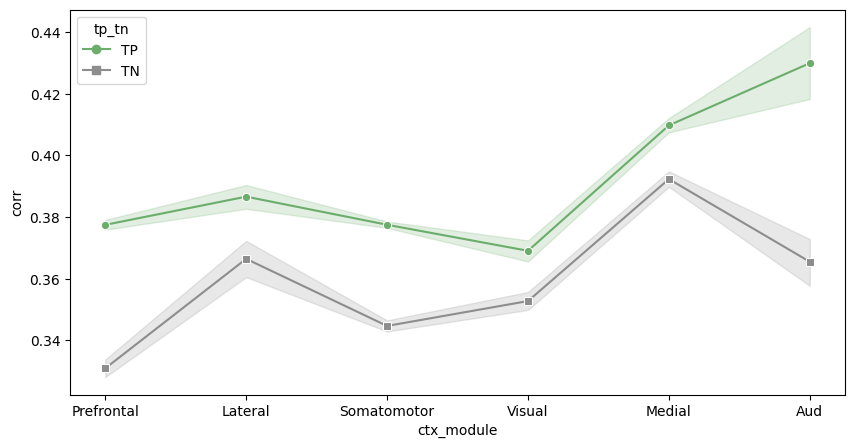

In [109]:
ctx_module = {'Prefrontal': ['ACAd', 'ACAv', 'PL', 'ILA', 'ORBl', 'ORBvl'], 'Lateral': ['AId'], 'Somatomotor' :['SSs', 'SSp-bfd', 'SSp-ll', 'SSp-ul', 'SSp-n', 'SSp-m', 'MOp', 'MOs'],
              'Visual': ['VISal', 'VISl', 'VISp', 'VISpor', 'VISrl'], 'Medial': ['VISam', 'VISpm', 'RSPd', 'RSPv'], 'Aud': ['AUDp']}
# Reset the index to ensure that the index is listed as a column
df1_reset = connect_strength.reset_index()
df2_reset = corr_df.reset_index()
# Merge Dataframe
merged_df = df1_reset.melt(id_vars=['index'], var_name='th_region', value_name='conn')
merged_df['corr'] = df2_reset.melt(id_vars=['index'], var_name='th_region', value_name='corr')['corr']
# Huge naming
merged_df.rename(columns={'index': 'ctx_region'}, inplace=True)

merged_df['ctx_module'] = 0
for i, c in enumerate(ctx_module.keys()):
    merged_df.loc[merged_df['ctx_region'].str.startswith(tuple(ctx_module[c])), 'ctx_module'] = c

merged_df['tp_tn'] = 0
merged_df.loc[merged_df['conn'] > -2, 'tp_tn'] = 'TP'
merged_df.loc[merged_df['conn'] == -10, 'tp_tn'] = 'TN'
merged_df = merged_df[merged_df['tp_tn'] != 0]

plt.figure(figsize=(10,5))
order = ['Prefrontal', 'Lateral', 'Somatomotor', 'Visual', 'Medial', 'Aud']
merged_df['ctx_module'] = pd.Categorical(merged_df['ctx_module'], categories=order, ordered=True)
custom_palette = {
    'TP': '#6bad6b',
    'TN': '#8d8d8d'
}
# Custom label style
custom_markers = {
    'TP': 'o',  # Circle label
    'TN': 's'   # Square label
}
sns.lineplot(data=merged_df, x="ctx_module", y="corr", hue="tp_tn", style="tp_tn", markers=custom_markers, dashes=False, palette=custom_palette)
# sns.lineplot(data=merged_df, x="ctx_module", y="corr", hue="tp_tn", err_style="bars")
# plt.savefig('./L56_Moudel_tp_tn_compare_line.pdf', format='pdf')